# Automated EDA libraries

## D-tale

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df=sns.load_dataset('planets')

In [ ]:
!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
dtale.show(df)

https://dz3hiflo7ev-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/9

## Pandas Profiling

In [ ]:
!pip install pandas-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA and Feature Engineering

## Dataset

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
(https://www.kaggle.com/datasets/sdolezel/black-friday)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing the dataset
df_train=pd.read_csv('train.csv')
df_train.head()
df_test=pd.read_csv('test.csv')



In [ ]:
# combining both train and test data
df=df_train.append(df_test)
df.head()
#concatenate
#merge like sql

<ipython-input-195-4b5f9cecc84f>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
##Basic  info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467198 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     467198 non-null  int64  
 1   Product_ID                  467198 non-null  object 
 2   Gender                      467198 non-null  object 
 3   Age                         467198 non-null  object 
 4   Occupation                  467198 non-null  int64  
 5   City_Category               467198 non-null  object 
 6   Stay_In_Current_City_Years  467198 non-null  object 
 7   Marital_Status              467198 non-null  int64  
 8   Product_Category_1          467198 non-null  int64  
 9   Product_Category_2          322510 non-null  float64
 10  Product_Category_3          142074 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 42.8+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,4.671980e+05,467198.000000,467198.000000,467198.000000,322510.000000,142074.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726503e+03,6.521140,0.491847,3.736376,5.094935,4.125930
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


## Feature Engineering

In [ ]:
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
# pd.get_dummies(df['Gender'],drop_first=1)df['Gender']

In [ ]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()
#onehot enconding

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
## Handle categorical feature Age
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [ ]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

# ##second technqiue
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])

# df['Age'].unique()

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,1,5,7,B,2,1,1,11.0,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0


In [ ]:
##fixing categorical City_categort

df_city=pd.get_dummies(df['City_Category'],drop_first=True)
###( assignment drop_first= 1)

In [ ]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,1,0
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,0,1
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,1,0
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,1,0
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,0,1


In [ ]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2,1,1,11.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,NaN,0,1
2,P00288442,0,4,1,4+,1,5,14.0,NaN,1,0
3,P00145342,0,4,1,4+,1,4,9.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,0,1


In [ ]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            144688
Product_Category_3            325124
B                                  0
C                                  0
dtype: int64

In [ ]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     54458
14.0    47452
2.0     42562
16.0    36864
15.0    32518
4.0     22056
5.0     21860
6.0     14218
11.0    12192
17.0    11568
13.0     9046
9.0      4968
12.0     4546
10.0     2754
18.0     2514
3.0      2478
7.0       456
Name: Product_Category_2, dtype: int64

In [ ]:
df['Product_Category_2'].mode()[0]

8.0

In [ ]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [ ]:
df['Product_Category_3'].value_counts()

16.0    27666
15.0    23910
14.0    15710
5.0     14282
17.0    14232
8.0     10598
9.0      9906
12.0     7738
13.0     4780
6.0      3996
18.0     3984
4.0      1632
11.0     1560
10.0     1550
3.0       530
Name: Product_Category_3, dtype: int64

In [ ]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,0,1
2,P00288442,0,4,1,4+,1,5,14.0,16.0,1,0
3,P00145342,0,4,1,4+,1,4,9.0,16.0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,0,1


In [ ]:
df.shape

(467198, 11)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-184-7d6a3c4db74c>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467198 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  467198 non-null  object 
 1   Gender                      467198 non-null  int64  
 2   Age                         467198 non-null  int64  
 3   Occupation                  467198 non-null  int64  
 4   Stay_In_Current_City_Years  467198 non-null  object 
 5   Marital_Status              467198 non-null  int64  
 6   Product_Category_1          467198 non-null  int64  
 7   Product_Category_2          467198 non-null  float64
 8   Product_Category_3          467198 non-null  float64
 9   B                           467198 non-null  uint8  
 10  C                           467198 non-null  uint8  
dtypes: float64(2), int64(5), object(2), uint8(2)
memory usage: 36.5+ MB


In [ ]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467198 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  467198 non-null  object 
 1   Gender                      467198 non-null  int64  
 2   Age                         467198 non-null  int64  
 3   Occupation                  467198 non-null  int64  
 4   Stay_In_Current_City_Years  467198 non-null  float64
 5   Marital_Status              467198 non-null  int64  
 6   Product_Category_1          467198 non-null  int64  
 7   Product_Category_2          467198 non-null  float64
 8   Product_Category_3          467198 non-null  float64
 9   B                           467198 non-null  uint8  
 10  C                           467198 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 36.5+ MB


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2.0,1,1,11.0,16.0,1,0
1,P00113442,1,3,17,0.0,0,3,5.0,16.0,0,1
2,P00288442,0,4,1,4.0,1,5,14.0,16.0,1,0
3,P00145342,0,4,1,4.0,1,4,9.0,16.0,1,0
4,P00053842,0,3,1,1.0,0,4,5.0,12.0,0,1


In [ ]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

## Visualization

<AxesSubplot: xlabel='Age', ylabel='Purchase'>

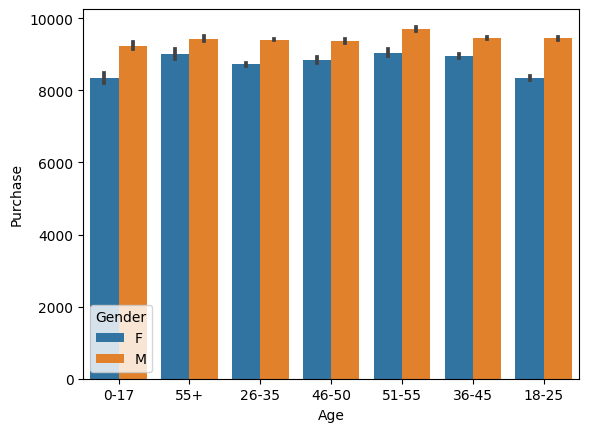

In [ ]:
##Visualisation Age vs Purchased
import seaborn as sns
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

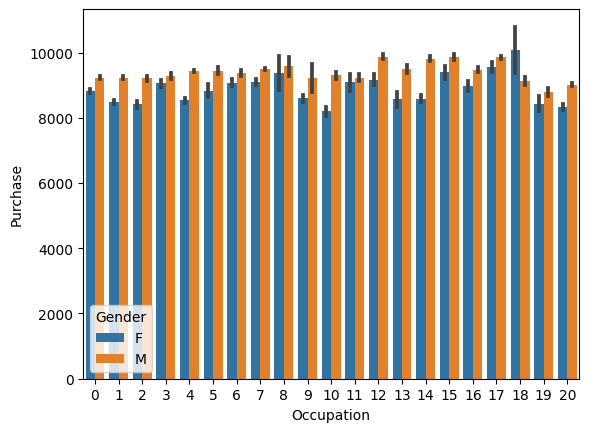

In [ ]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

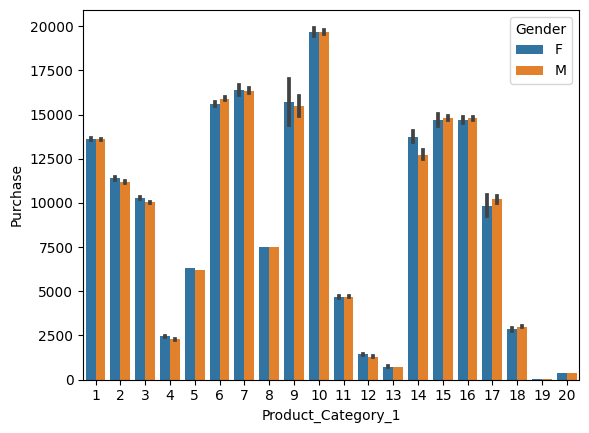

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

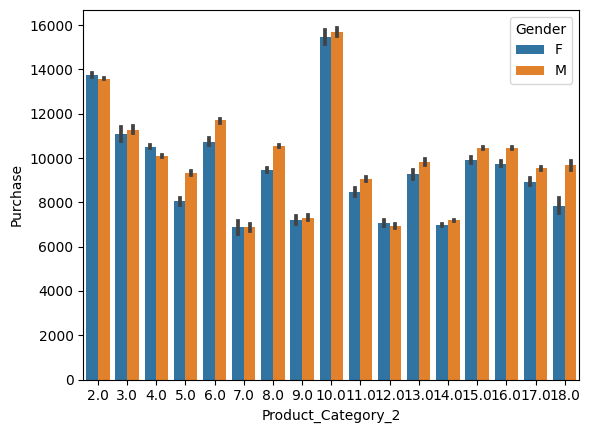

In [ ]:

sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

In [ ]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [ ]:
df.head()

## Feature Scaling

In [ ]:
##Feature Scaling
df_test=df[df['Purchase'].isnull()]

In [ ]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
X=df_train.drop('Purchase',axis=1)

In [ ]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [ ]:
X.shape

(550068, 11)

In [ ]:
y=df_train['Purchase']

In [ ]:
y.shape

(550068,)

In [ ]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: ignored